In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, normaltest,kurtosis


You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

In [2]:
df = pd.read_csv('house_price.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## Exercise 1


 Perform basic EDA

In [3]:
# Info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [4]:
# Summary statistics
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
# dataset shape
df.shape 

(13200, 7)

In [6]:
# to view the last rows
df.tail(7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13193,Uttarahalli,3 BHK,1345.0,2.0,57.0,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.0,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [7]:
# Checking for Missing values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [8]:
# Check for Duplicates
df.duplicated().sum()

1049

In [9]:
# Remove exact duplicate rows
df = df.drop_duplicates()

# Verify removal
new_duplicate_count = df.duplicated().sum()
new_duplicate_count, df.shape


(0, (12151, 7))

## Exercise 2


Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method


In [12]:
# Step 1: Mean & Standard Deviation Method 

# Compute mean and standard deviation for each column
mean_total_sqft = df["total_sqft"].mean()
std_total_sqft = df["total_sqft"].std()
mean_bath = df["bath"].mean()
std_bath = df["bath"].std()
mean_price = df["price"].mean()
std_price = df["price"].std()
mean_bhk = df["bhk"].mean()
std_bhk = df["bhk"].std()

# Define lower and upper bounds (Mean ± 3 * Std Dev)
lower_total_sqft = mean_total_sqft - 3 * std_total_sqft
upper_total_sqft = mean_total_sqft + 3 * std_total_sqft

lower_bath = mean_bath - 3 * std_bath
upper_bath = mean_bath + 3 * std_bath

lower_price = mean_price - 3 * std_price
upper_price = mean_price + 3 * std_price

lower_bhk = mean_bhk - 3 * std_bhk
upper_bhk = mean_bhk + 3 * std_bhk

# Detect outliers 
outliers_total_sqft = df[(df["total_sqft"] < lower_total_sqft) | (df["total_sqft"] > upper_total_sqft)]
outliers_bath = df[(df["bath"] < lower_bath) | (df["bath"] > upper_bath)]
outliers_price = df[(df["price"] < lower_price) | (df["price"] > upper_price)]
outliers_bhk = df[(df["bhk"] < lower_bhk) | (df["bhk"] > upper_bhk)]

# Print detected outliers
print("Mean & Standard Deviation Method Outliers:\n")
print(f"Total Sqft: {len(outliers_total_sqft)} outliers detected")
print(outliers_total_sqft[["total_sqft"]].head(), "\n")

print(f"Bath: {len(outliers_bath)} outliers detected")
print(outliers_bath[["bath"]].head(), "\n")

print(f"Price: {len(outliers_price)} outliers detected")
print(outliers_price[["price"]].head(), "\n")

print(f"BHK: {len(outliers_bhk)} outliers detected")
print(outliers_bhk[["bhk"]].head(), "\n")


Mean & Standard Deviation Method Outliers:

Total Sqft: 106 outliers detected
     total_sqft
61       5700.0
120      5611.5
404     12000.0
435     11890.0
509      8500.0 

Bath: 238 outliers detected
     bath
45    9.0
63    8.0
67    7.0
83    7.0
127   7.0 

Price: 185 outliers detected
      price
7     600.0
61    650.0
157   760.0
404  2200.0
435   700.0 

BHK: 264 outliers detected
     bhk
45     8
63     8
67     8
127    7
138    8 



In [13]:
# Step 2: Percentile Method 

# Compute 1st and 99th percentiles for each column
p1_total_sqft = np.percentile(df["total_sqft"], 1)
p99_total_sqft = np.percentile(df["total_sqft"], 99)

p1_bath = np.percentile(df["bath"], 1)
p99_bath = np.percentile(df["bath"], 99)

p1_price = np.percentile(df["price"], 1)
p99_price = np.percentile(df["price"], 99)

p1_bhk = np.percentile(df["bhk"], 1)
p99_bhk = np.percentile(df["bhk"], 99)

# Detect outliers 
outliers_total_sqft_percentile = df[(df["total_sqft"] < p1_total_sqft) | (df["total_sqft"] > p99_total_sqft)]
outliers_bath_percentile = df[(df["bath"] < p1_bath) | (df["bath"] > p99_bath)]
outliers_price_percentile = df[(df["price"] < p1_price) | (df["price"] > p99_price)]
outliers_bhk_percentile = df[(df["bhk"] < p1_bhk) | (df["bhk"] > p99_bhk)]

# Print detected outliers
print("Percentile Method Outliers:\n")
print(f"Total Sqft: {len(outliers_total_sqft_percentile)} outliers detected")
print(outliers_total_sqft_percentile[["total_sqft"]].head(), "\n")

print(f"Bath: {len(outliers_bath_percentile)} outliers detected")
print(outliers_bath_percentile[["bath"]].head(), "\n")

print(f"Price: {len(outliers_price_percentile)} outliers detected")
print(outliers_price_percentile[["price"]].head(), "\n")

print(f"BHK: {len(outliers_bhk_percentile)} outliers detected")
print(outliers_bhk_percentile[["bhk"]].head(), "\n")


Percentile Method Outliers:

Total Sqft: 238 outliers detected
     total_sqft
61       5700.0
77        460.0
117       276.0
120      5611.5
169       450.0 

Bath: 73 outliers detected
     bath
45    9.0
454   9.0
533   9.0
760   9.0
925  11.0 

Price: 239 outliers detected
     price
20    15.0
99    17.0
130   16.5
157  760.0
169   11.0 

BHK: 78 outliers detected
      bhk
454    11
533     9
760     9
925     9
1033    9 



In [14]:
# Step 3: IQR Method 

# Compute Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_total_sqft = df["total_sqft"].quantile(0.25)
Q3_total_sqft = df["total_sqft"].quantile(0.75)
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft

Q1_bath = df["bath"].quantile(0.25)
Q3_bath = df["bath"].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath

Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_bhk = df["bhk"].quantile(0.25)
Q3_bhk = df["bhk"].quantile(0.75)
IQR_bhk = Q3_bhk - Q1_bhk

# Define lower and upper bounds (1.5 * IQR)
lower_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
upper_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft

lower_bath = Q1_bath - 1.5 * IQR_bath
upper_bath = Q3_bath + 1.5 * IQR_bath

lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

lower_bhk = Q1_bhk - 1.5 * IQR_bhk
upper_bhk = Q3_bhk + 1.5 * IQR_bhk

# Detect outliers 
outliers_total_sqft_iqr = df[(df["total_sqft"] < lower_total_sqft) | (df["total_sqft"] > upper_total_sqft)]
outliers_bath_iqr = df[(df["bath"] < lower_bath) | (df["bath"] > upper_bath)]
outliers_price_iqr = df[(df["price"] < lower_price) | (df["price"] > upper_price)]
outliers_bhk_iqr = df[(df["bhk"] < lower_bhk) | (df["bhk"] > upper_bhk)]

# Print detected outliers
print("IQR Method Outliers:\n")
print(f"Total Sqft: {len(outliers_total_sqft_iqr)} outliers detected")
print(outliers_total_sqft_iqr[["total_sqft"]].head(), "\n")

print(f"Bath: {len(outliers_bath_iqr)} outliers detected")
print(outliers_bath_iqr[["bath"]].head(), "\n")

print(f"Price: {len(outliers_price_iqr)} outliers detected")
print(outliers_price_iqr[["price"]].head(), "\n")

print(f"BHK: {len(outliers_bhk_iqr)} outliers detected")
print(outliers_bhk_iqr[["bhk"]].head(), "\n")


IQR Method Outliers:

Total Sqft: 1069 outliers detected
    total_sqft
6       2732.0
7       3300.0
11      2785.0
18      2770.0
22      2800.0 

Bath: 1009 outliers detected
    bath
1    5.0
9    6.0
11   5.0
22   5.0
45   9.0 

Price: 1165 outliers detected
    price
7   600.0
9   370.0
11  295.0
18  290.0
22  380.0 

BHK: 821 outliers detected
    bhk
9     6
45    8
57    6
63    8
67    8 



In [15]:
# Step 4: Z-Score Method 

# Compute mean and standard deviation again (already calculated earlier)
# Define Z-Score threshold (commonly used threshold is 3)
z_threshold = 3

# Compute Z-Scores for each column manually
z_total_sqft = (df["total_sqft"] - mean_total_sqft) / std_total_sqft
z_bath = (df["bath"] - mean_bath) / std_bath
z_price = (df["price"] - mean_price) / std_price
z_bhk = (df["bhk"] - mean_bhk) / std_bhk

# Detect outliers where Z-Score is greater than the threshold
outliers_total_sqft_z = df[(z_total_sqft < -z_threshold) | (z_total_sqft > z_threshold)]
outliers_bath_z = df[(z_bath < -z_threshold) | (z_bath > z_threshold)]
outliers_price_z = df[(z_price < -z_threshold) | (z_price > z_threshold)]
outliers_bhk_z = df[(z_bhk < -z_threshold) | (z_bhk > z_threshold)]

# Print detected outliers
print("Z-Score Method Outliers:\n")
print(f"Total Sqft: {len(outliers_total_sqft_z)} outliers detected")
print(outliers_total_sqft_z[["total_sqft"]].head(), "\n")

print(f"Bath: {len(outliers_bath_z)} outliers detected")
print(outliers_bath_z[["bath"]].head(), "\n")

print(f"Price: {len(outliers_price_z)} outliers detected")
print(outliers_price_z[["price"]].head(), "\n")

print(f"BHK: {len(outliers_bhk_z)} outliers detected")
print(outliers_bhk_z[["bhk"]].head(), "\n")


Z-Score Method Outliers:

Total Sqft: 106 outliers detected
     total_sqft
61       5700.0
120      5611.5
404     12000.0
435     11890.0
509      8500.0 

Bath: 238 outliers detected
     bath
45    9.0
63    8.0
67    7.0
83    7.0
127   7.0 

Price: 185 outliers detected
      price
7     600.0
61    650.0
157   760.0
404  2200.0
435   700.0 

BHK: 264 outliers detected
     bhk
45     8
63     8
67     8
127    7
138    8 



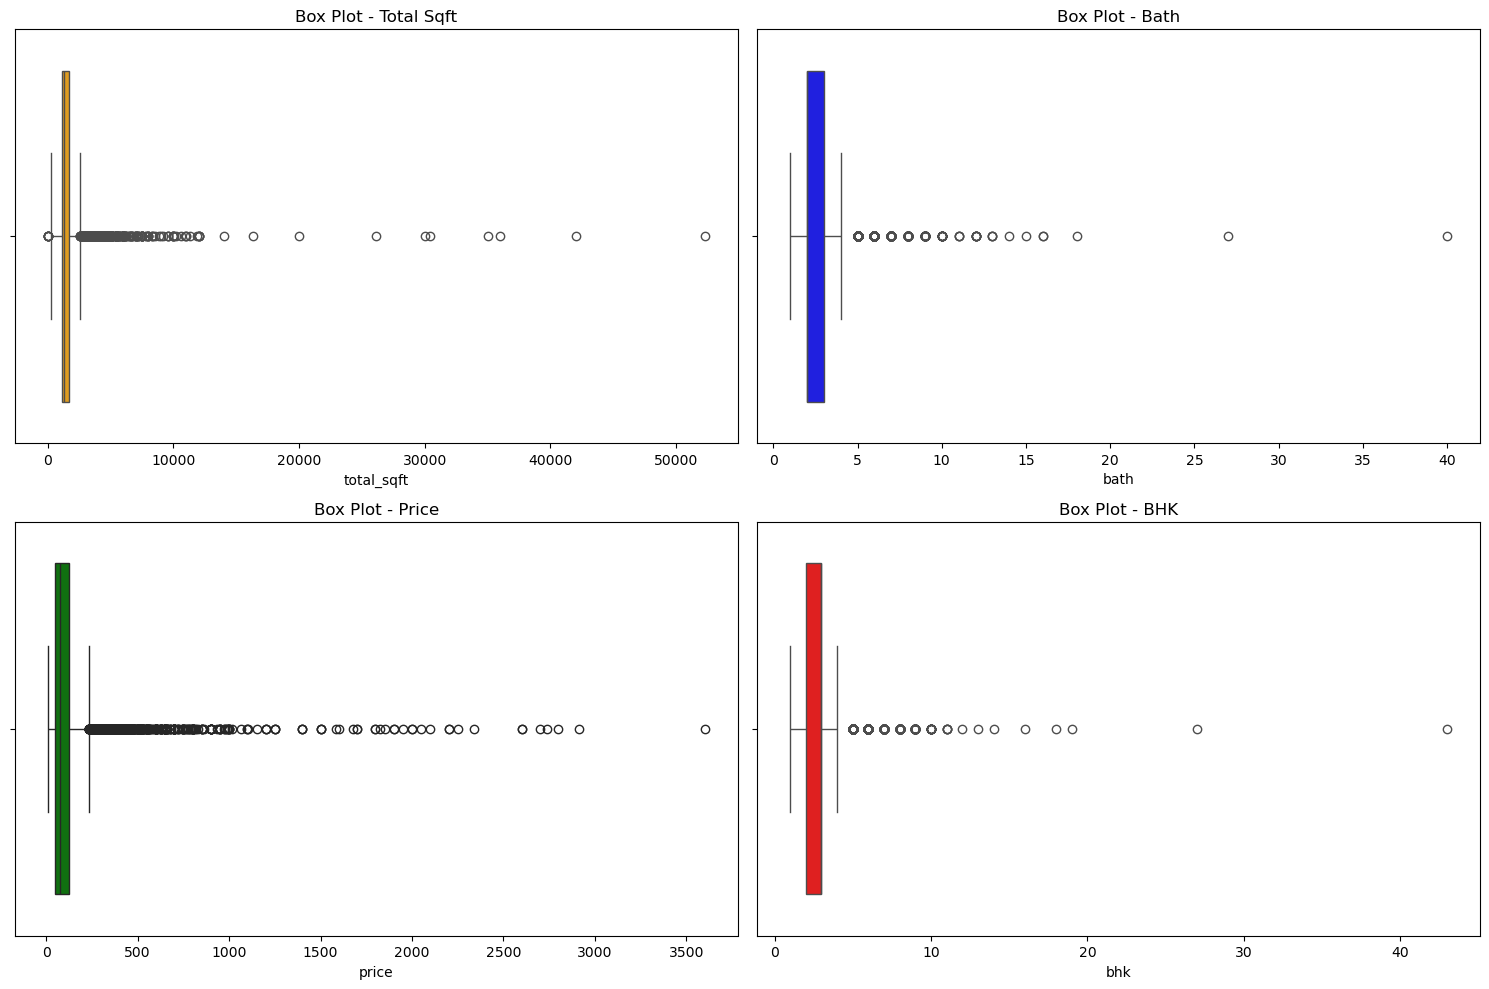

In [16]:

plt.figure(figsize=(15, 10))

# Boxplot for Total Sqft
plt.subplot(2, 2, 1)
sns.boxplot(x=df["total_sqft"], color="orange")
plt.title("Box Plot - Total Sqft")

# Boxplot for Bath
plt.subplot(2, 2, 2)
sns.boxplot(x=df["bath"], color="blue")
plt.title("Box Plot - Bath")

# Boxplot for Price
plt.subplot(2, 2, 3)
sns.boxplot(x=df["price"], color="green")
plt.title("Box Plot - Price")

# Boxplot for BHK
plt.subplot(2, 2, 4)
sns.boxplot(x=df["bhk"], color="red")
plt.title("Box Plot - BHK")

plt.tight_layout()
plt.show()


In [17]:
# Step 1: Compute IQR for each numerical column
Q1_total_sqft = df["total_sqft"].quantile(0.25)
Q3_total_sqft = df["total_sqft"].quantile(0.75)
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft

Q1_bath = df["bath"].quantile(0.25)
Q3_bath = df["bath"].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath

Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_bhk = df["bhk"].quantile(0.25)
Q3_bhk = df["bhk"].quantile(0.75)
IQR_bhk = Q3_bhk - Q1_bhk

# Define lower and upper bounds (1.5 * IQR)
lower_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
upper_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft

lower_bath = Q1_bath - 1.5 * IQR_bath
upper_bath = Q3_bath + 1.5 * IQR_bath

lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

lower_bhk = Q1_bhk - 1.5 * IQR_bhk
upper_bhk = Q3_bhk + 1.5 * IQR_bhk

# Trimming: Remove outliers beyond the IQR limits
df_trimmed = df[
    (df["total_sqft"] >= lower_total_sqft) & (df["total_sqft"] <= upper_total_sqft) &
    (df["bath"] >= lower_bath) & (df["bath"] <= upper_bath) &
    (df["price"] >= lower_price) & (df["price"] <= upper_price) &
    (df["bhk"] >= lower_bhk) & (df["bhk"] <= upper_bhk)
]

# Display number of rows removed
rows_removed = len(df) - len(df_trimmed)
rows_removed


2067

In [18]:
# Capping

# Create a copy of the dataset for capping
df_capped = df.copy()

# Apply capping for total_sqft
df_capped["total_sqft"] = np.where(df_capped["total_sqft"] > upper_total_sqft, upper_total_sqft, df_capped["total_sqft"])
df_capped["total_sqft"] = np.where(df_capped["total_sqft"] < lower_total_sqft, lower_total_sqft, df_capped["total_sqft"])

# Apply capping for bath
df_capped["bath"] = np.where(df_capped["bath"] > upper_bath, upper_bath, df_capped["bath"])
df_capped["bath"] = np.where(df_capped["bath"] < lower_bath, lower_bath, df_capped["bath"])

# Apply capping for price
df_capped["price"] = np.where(df_capped["price"] > upper_price, upper_price, df_capped["price"])
df_capped["price"] = np.where(df_capped["price"] < lower_price, lower_price, df_capped["price"])

# Apply capping for bhk
df_capped["bhk"] = np.where(df_capped["bhk"] > upper_bhk, upper_bhk, df_capped["bhk"])
df_capped["bhk"] = np.where(df_capped["bhk"] < lower_bhk, lower_bhk, df_capped["bhk"])

# Check if any values were capped
df_capped.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1442.755165,2.589046,95.727171,2.702946,8.132642e+03
std,543.786127,0.930293,62.057118,0.883504,1.112329e+05
min,200.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,2600.000000,4.500000,233.750000,4.500000,1.200000e+07


In [19]:
# Imputation: 

# Create a copy of the dataset for imputation
df_imputed = df.copy()

# Compute medians
median_total_sqft = df["total_sqft"].median()
median_bath = df["bath"].median()
median_price = df["price"].median()
median_bhk = df["bhk"].median()

# Replace outliers with median values
df_imputed.loc[(df["total_sqft"] > upper_total_sqft) | (df["total_sqft"] < lower_total_sqft), "total_sqft"] = median_total_sqft
df_imputed.loc[(df["bath"] > upper_bath) | (df["bath"] < lower_bath), "bath"] = median_bath
df_imputed.loc[(df["price"] > upper_price) | (df["price"] < lower_price), "price"] = median_price
df_imputed.loc[(df["bhk"] > upper_bhk) | (df["bhk"] < lower_bhk), "bhk"] = median_bhk

# Check the updated dataset statistics
df_imputed.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1328.888816,2.381450,80.410839,2.601597,8.132642e+03
std,408.463700,0.740202,42.838149,0.747029,1.112329e+05
min,250.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1516.500000,3.000000,95.000000,3.000000,7.461000e+03
max,2600.000000,4.000000,233.000000,4.000000,1.200000e+07


## Exercise 3

 Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

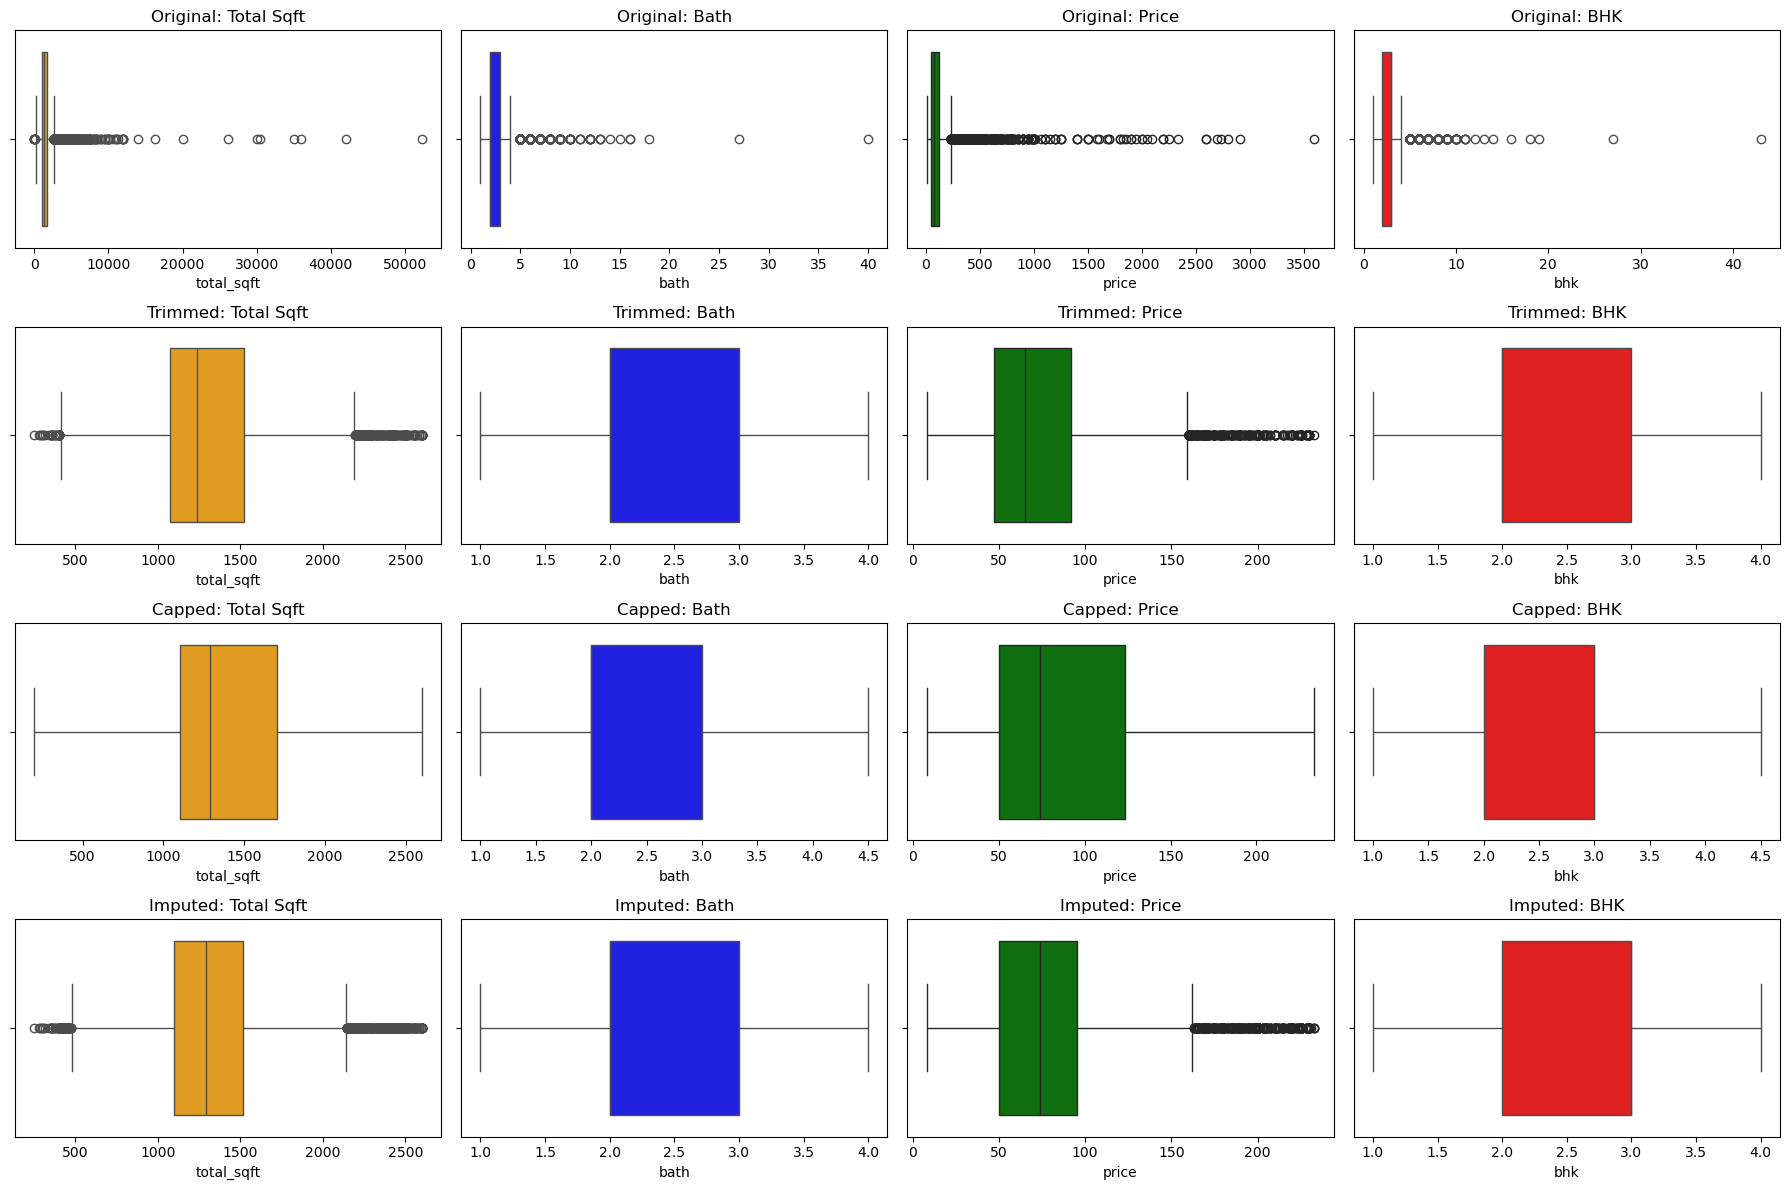

In [20]:
plt.figure(figsize=(18, 12))

# Boxplot for Original Data
plt.subplot(4, 4, 1)
sns.boxplot(x=df["total_sqft"], color="orange")
plt.title("Original: Total Sqft")

plt.subplot(4, 4, 2)
sns.boxplot(x=df["bath"], color="blue")
plt.title("Original: Bath")

plt.subplot(4, 4, 3)
sns.boxplot(x=df["price"], color="green")
plt.title("Original: Price")

plt.subplot(4, 4, 4)
sns.boxplot(x=df["bhk"], color="red")
plt.title("Original: BHK")

# Boxplot for Trimmed Data
plt.subplot(4, 4, 5)
sns.boxplot(x=df_trimmed["total_sqft"], color="orange")
plt.title("Trimmed: Total Sqft")

plt.subplot(4, 4, 6)
sns.boxplot(x=df_trimmed["bath"], color="blue")
plt.title("Trimmed: Bath")

plt.subplot(4, 4, 7)
sns.boxplot(x=df_trimmed["price"], color="green")
plt.title("Trimmed: Price")

plt.subplot(4, 4, 8)
sns.boxplot(x=df_trimmed["bhk"], color="red")
plt.title("Trimmed: BHK")

# Boxplot for Capped Data
plt.subplot(4, 4, 9)
sns.boxplot(x=df_capped["total_sqft"], color="orange")
plt.title("Capped: Total Sqft")

plt.subplot(4, 4, 10)
sns.boxplot(x=df_capped["bath"], color="blue")
plt.title("Capped: Bath")

plt.subplot(4, 4, 11)
sns.boxplot(x=df_capped["price"], color="green")
plt.title("Capped: Price")

plt.subplot(4, 4, 12)
sns.boxplot(x=df_capped["bhk"], color="red")
plt.title("Capped: BHK")

# Boxplot for Imputed Data
plt.subplot(4, 4, 13)
sns.boxplot(x=df_imputed["total_sqft"], color="orange")
plt.title("Imputed: Total Sqft")

plt.subplot(4, 4, 14)
sns.boxplot(x=df_imputed["bath"], color="blue")
plt.title("Imputed: Bath")

plt.subplot(4, 4, 15)
sns.boxplot(x=df_imputed["price"], color="green")
plt.title("Imputed: Price")

plt.subplot(4, 4, 16)
sns.boxplot(x=df_imputed["bhk"], color="red")
plt.title("Imputed: BHK")

plt.tight_layout()
plt.show()


## Exercise 4

Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation

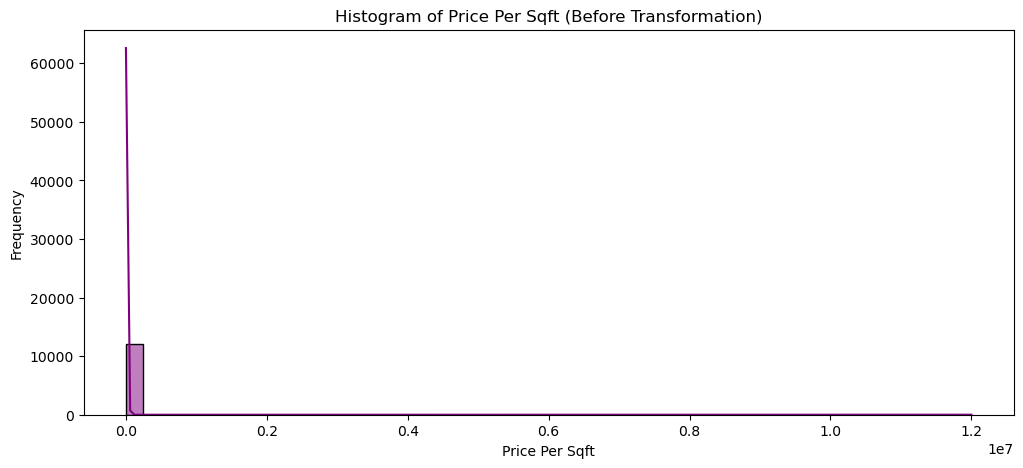

(103.88920549434178, 11131.230839805388)

In [24]:
# Extract the target column (price per sqft)
price_per_sqft = df["price_per_sqft"]

# Plot histogram to check normality
plt.figure(figsize=(12, 5))
sns.histplot(price_per_sqft, bins=50, kde=True, color="purple")
plt.title("Histogram of Price Per Sqft (Before Transformation)")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness and kurtosis before transformation
original_skewness = skew(price_per_sqft)
original_kurtosis = kurtosis(price_per_sqft)

(original_skewness, original_kurtosis)


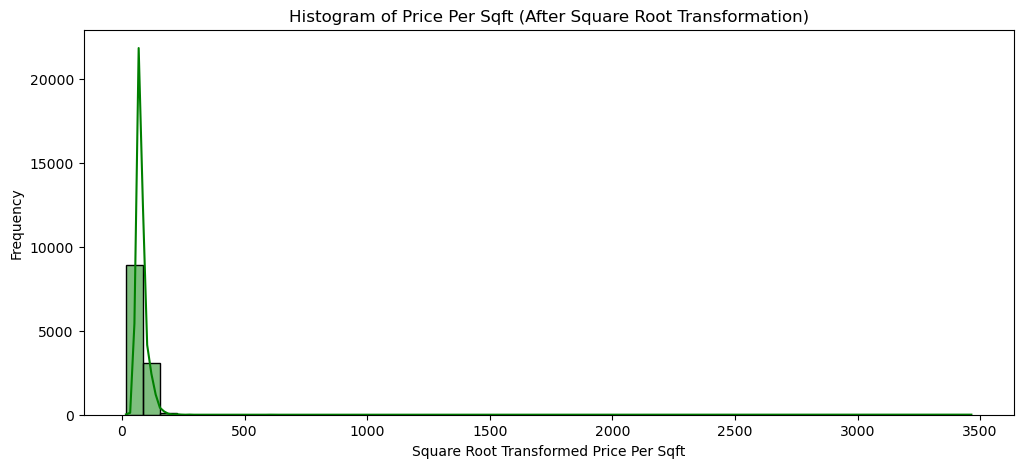

(50.033366475048076, 3834.1175066352994)

In [26]:
# Apply Square Root Transformation
price_per_sqft_sqrt = np.sqrt(price_per_sqft)

# Plot histogram after square root transformation
plt.figure(figsize=(12, 5))
sns.histplot(price_per_sqft_sqrt, bins=50, kde=True, color="green")
plt.title("Histogram of Price Per Sqft (After Square Root Transformation)")
plt.xlabel("Square Root Transformed Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness and kurtosis after square root transformation
sqrt_skewness = skew(price_per_sqft_sqrt)
sqrt_kurtosis = kurtosis(price_per_sqft_sqrt)

(sqrt_skewness, sqrt_kurtosis)


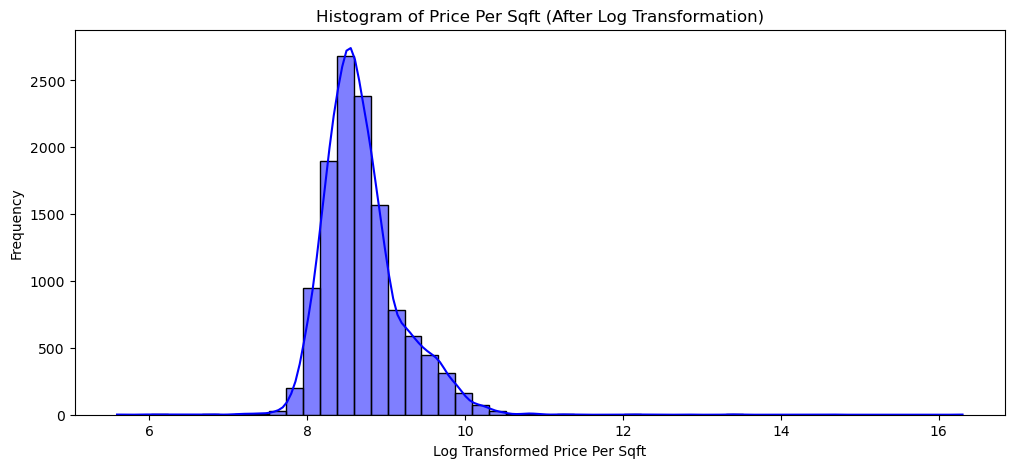

(1.400870354404583, 9.404434549652514)

In [27]:
# Apply Log Transformation to reduce skewness
price_per_sqft_log = np.log1p(price_per_sqft)  # log(1 + x) to avoid log(0) issues

# Plot histogram after log transformation
plt.figure(figsize=(12, 5))
sns.histplot(price_per_sqft_log, bins=50, kde=True, color="blue")
plt.title("Histogram of Price Per Sqft (After Log Transformation)")
plt.xlabel("Log Transformed Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness and kurtosis after transformation
log_skewness = skew(price_per_sqft_log)
log_kurtosis = kurtosis(price_per_sqft_log)

(log_skewness, log_kurtosis)


Skewness reduced to 1.40 (much closer to normal distribution).
Kurtosis reduced to 9.20, indicating a significant reduction in extreme values.
Histogram shows a more symmetric shape compared to before.

## Exercise 5

Check the correlation between all the numerical columns and plot heatmap

In [28]:
correlation_values = df[["total_sqft", "bath", "price", "bhk", "price_per_sqft"]].corr()


print("Correlation Matrix:\n", correlation_values)


Correlation Matrix:
                 total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.386694  0.572516  0.339936       -0.008877
bath              0.386694  1.000000  0.448802  0.898875        0.030133
price             0.572516  0.448802  1.000000  0.390008        0.027415
bhk               0.339936  0.898875  0.390008  1.000000        0.030294
price_per_sqft   -0.008877  0.030133  0.027415  0.030294        1.000000


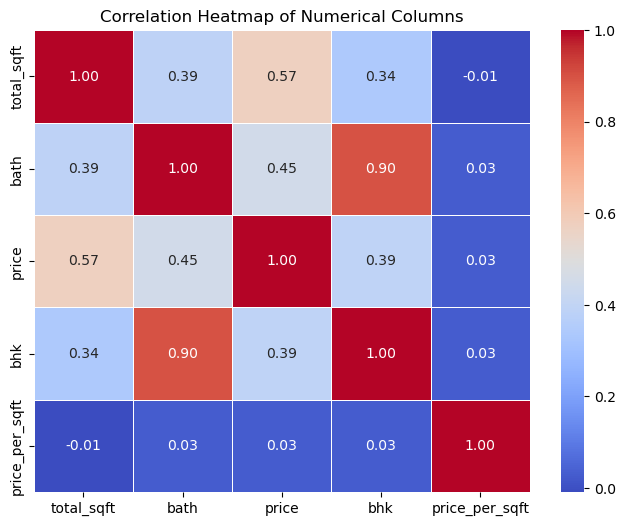

In [29]:

correlation_matrix = df[["total_sqft", "bath", "price", "bhk", "price_per_sqft"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()



Total Sqft & Price - Moderate correlation (0.57)
Bath & BHK - Strong correlation (0.89)
Price per Sqft & Other Features - Very weak correlation (~0.03)

Price and Total Sqft - Strong positive correlation (Expected, as larger homes cost more).
Bath and Price - High correlation, meaning more bathrooms generally indicate higher prices.
BHK and Total Sqft - Positively correlated, as more BHKs require more space.
Price per Sqft vs Other Features - Weak correlation, meaning price per sqft varies independently from these features.

## Exercise 6

Draw Scatter plot between the variables to check the correlation between them

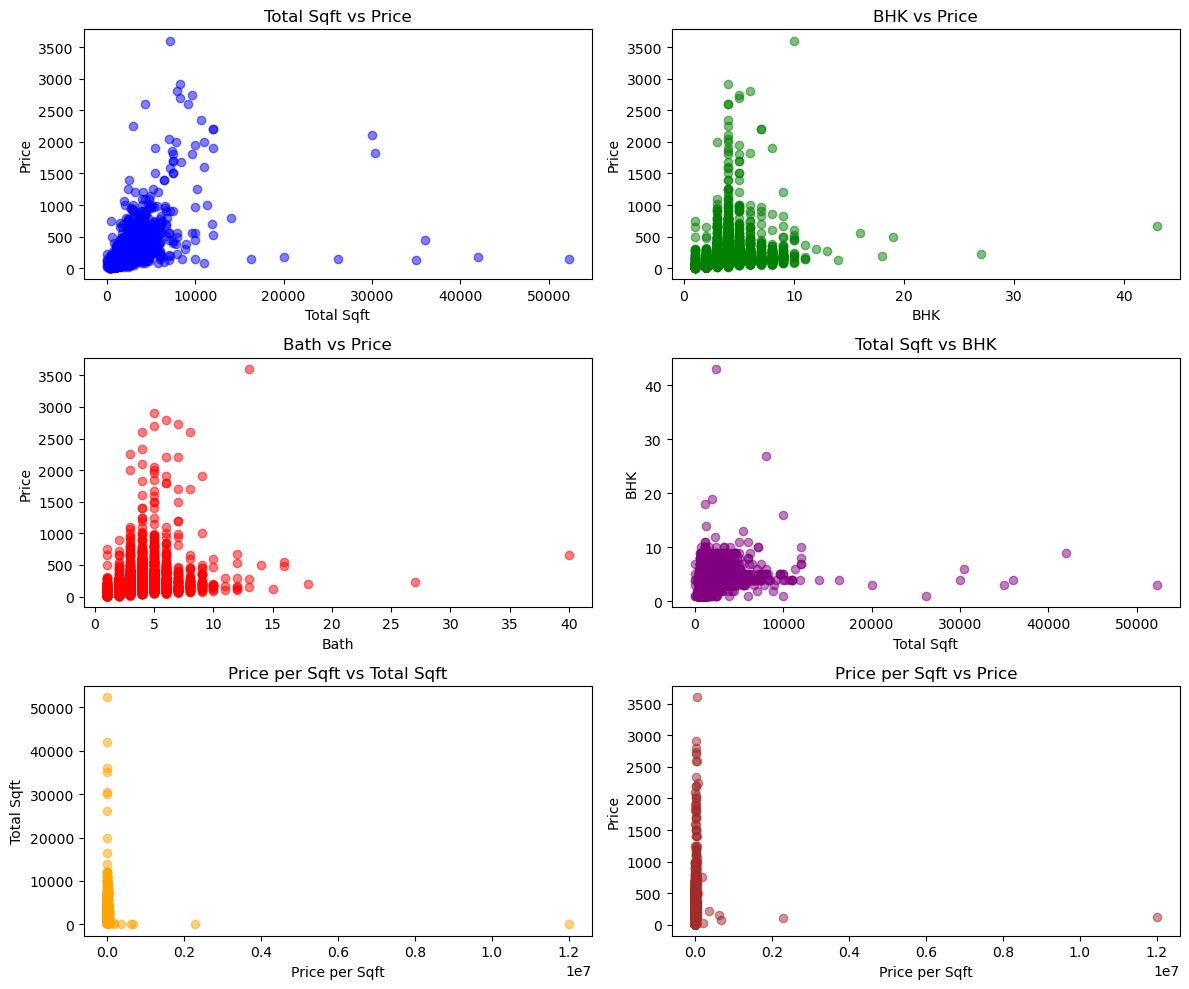

In [31]:
# Scatter plot between Total Sqft and Price
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.scatter(df["total_sqft"], df["price"], alpha=0.5, color='blue')
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Total Sqft vs Price")

# Scatter plot between BHK and Price
plt.subplot(3, 2, 2)
plt.scatter(df["bhk"], df["price"], alpha=0.5, color='green')
plt.xlabel("BHK")
plt.ylabel("Price")
plt.title("BHK vs Price")

# Scatter plot between Bath and Price
plt.subplot(3, 2, 3)
plt.scatter(df["bath"], df["price"], alpha=0.5, color='red')
plt.xlabel("Bath")
plt.ylabel("Price")
plt.title("Bath vs Price")

# Scatter plot between Total Sqft and BHK
plt.subplot(3, 2, 4)
plt.scatter(df["total_sqft"], df["bhk"], alpha=0.5, color='purple')
plt.xlabel("Total Sqft")
plt.ylabel("BHK")
plt.title("Total Sqft vs BHK")

# Scatter plot between Price per Sqft and Total Sqft
plt.subplot(3, 2, 5)
plt.scatter(df["price_per_sqft"], df["total_sqft"], alpha=0.5, color='orange')
plt.xlabel("Price per Sqft")
plt.ylabel("Total Sqft")
plt.title("Price per Sqft vs Total Sqft")

# Scatter plot between Price per Sqft and Price
plt.subplot(3, 2, 6)
plt.scatter(df["price_per_sqft"], df["price"], alpha=0.5, color='brown')
plt.xlabel("Price per Sqft")
plt.ylabel("Price")
plt.title("Price per Sqft vs Price")

plt.tight_layout()
plt.show()
